In [2]:
import numpy as np
from sklearn.datasets import fetch_openml
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
%config InlineBackend.figure_format = 'retina'


In [3]:
# retrieve the data from sklearn datasets
mnist=fetch_openml(name='mnist_784')
X=mnist.data
y=mnist.target

In [4]:
def plot_MNIST_sample(X):
    """
    Plots 9 images in the MNIST dataset.

    Args:
     X (numpy array of floats) : Data matrix each column corresponds to a
                                 different random variable

    Returns:
    Nothing.

    """

    fig, ax = plt.subplots()
    k = 0
    for k1 in range(3):
        for k2 in range(3):
            k = k + 1
            plt.imshow(np.reshape(X[k, :], (28, 28)),
                     extent=[(k1 + 1) * 28, k1 * 28, (k2+1) * 28, k2 * 28],
                     vmin=0, vmax=255)
    plt.xlim((3 * 28, 0))
    plt.ylim((3 * 28, 0))
    plt.tick_params(axis='both', which='both', bottom=False, top=False,
                  labelbottom=False)
    plt.clim([0, 250])
    ax.set_xticks([])
    ax.set_yticks([])
    plt.show()



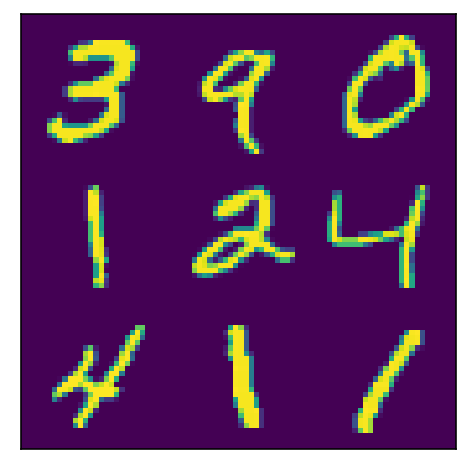

In [5]:
plot_MNIST_sample(X)

In [104]:
def sort_evals_descending(evals, evectors):
    """
    Sorts eigenvalues and eigenvectors in decreasing order. This function
    also aligns the first two eigenvectors to be in first two quadrants if
    the data is 2D (remember that any eigenvector's direction can be inverted
    and it is still an eigenvector with the same eigenvalue). 
    """
    # reversing the index of the evals
    index = np.flip(np.argsort(evals))
    # Sorting eigenValues
    evals = evals[index]
    # EigenVectors sorted by index
    evectors = evectors[:, index]
    
    # if the number of rows in the eval matrix is 2 do something
    if evals.shape[0] == 2:
        # (X,0)->X
        if np.arccos(np.matmul(evectors[:, 0], 1 / np.sqrt(2) * np.array([1, 1]))) > np.pi / 2:
            evectors[:, 0] = -evectors[:, 0]
        if np.arccos(np.matmul(evectors[:, 1], 1 / np.sqrt(2) * np.array([-1, 1]))) > np.pi / 2:
            evectors[:, 1] = -evectors[:, 1]
    return evals, evectors



In [126]:
def pca(X):
    
    mean_by_feature = np.mean(X,axis=0)
    centred_data = X - mean_by_feature
    
    # change x to D by n before multiplication to get a D by D covariance matrix
    covariance = 1/len(X[:,0])* np.matmul(centred_data.T, centred_data)
    
    eigenVal , eigenVec = np.linalg.eigh(covariance)
    
    eigenVal , eigenVec = sort_evals_descending(eigenVal, eigenVec)
    
    score=np.matmul(centred_data, eigenVec)
    
    return score, eigenVec, eigenVal, centred_data, mean_by_feature
    

In [106]:
projected_data=centred_data@ eigenVec[:,:2]



In [127]:
score,eigenVec,eigenVal,centred_data, mean_by_feature=pca(X)

In [108]:
eigenVec.shape

(784, 784)

In [109]:
score.shape

(70000, 784)

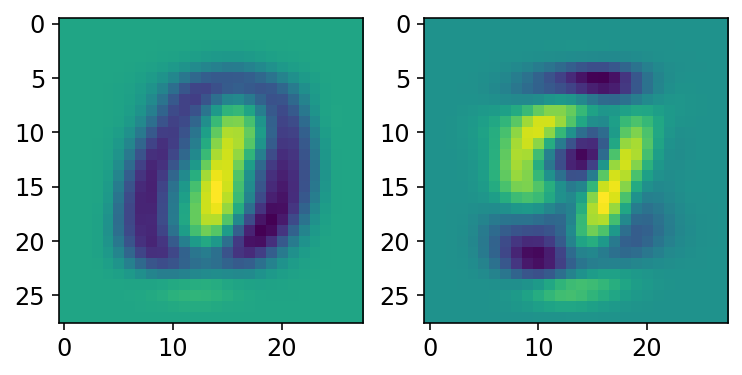

In [110]:

#plt.subplot (141)
#plt.imshow(((eigenVec[:, 0]*eigenVal[0])+mean_by_feature).reshape(28,28))
#plt.subplot (142)
#plt.imshow((eigenVec[:,1]*eigenVal[1]+mean_by_feature).reshape(28,28))

plt.subplot (121)
plt.imshow(((eigenVec[:, 0])).reshape(28,28),label='PC1')
plt.subplot (122)
plt.imshow((eigenVec[:,1]).reshape(28,28),label='PC2')

plt.show()


In [111]:
eigenVec.shape

(784, 784)

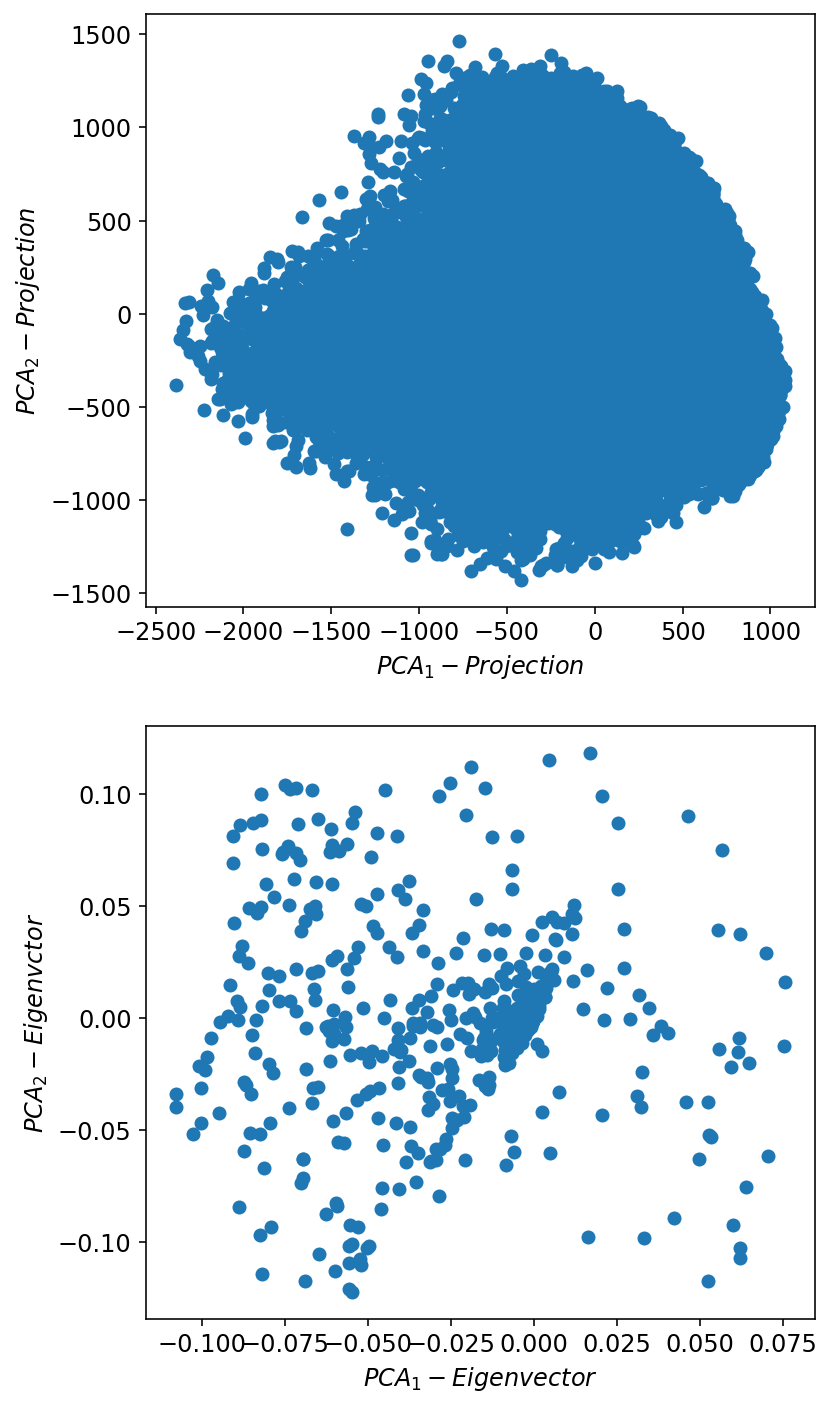

In [112]:
plt.figure(figsize=(6,12))

plt.subplot(211)
plt.scatter(projected_data[:,0],projected_data[:,1])
plt.xlabel('$PCA_1-Projection$')
plt.ylabel('$PCA_2-Projection$')

plt.subplot(212)
plt.scatter(eigenVec[:,0],eigenVec[:,1])
plt.xlabel('$PCA_1-Eigenvector$')
plt.ylabel('$PCA_2- Eigenvctor$')

plt.show()

In [113]:
def plot_eigenvalues(evals, limit=True):
    """
    Plots eigenvalues.
    """

    plt.figure(figsize=(10,4))
    plt.plot(np.arange(1, len(evals) + 1), evals, 'o-k')
    plt.xlabel('Component')
    plt.ylabel('Eigenvalue')
    plt.title('Scree plot')
    if limit:
        plt.xlim([0, 100])  # limit x-axis up to 100 for zooming

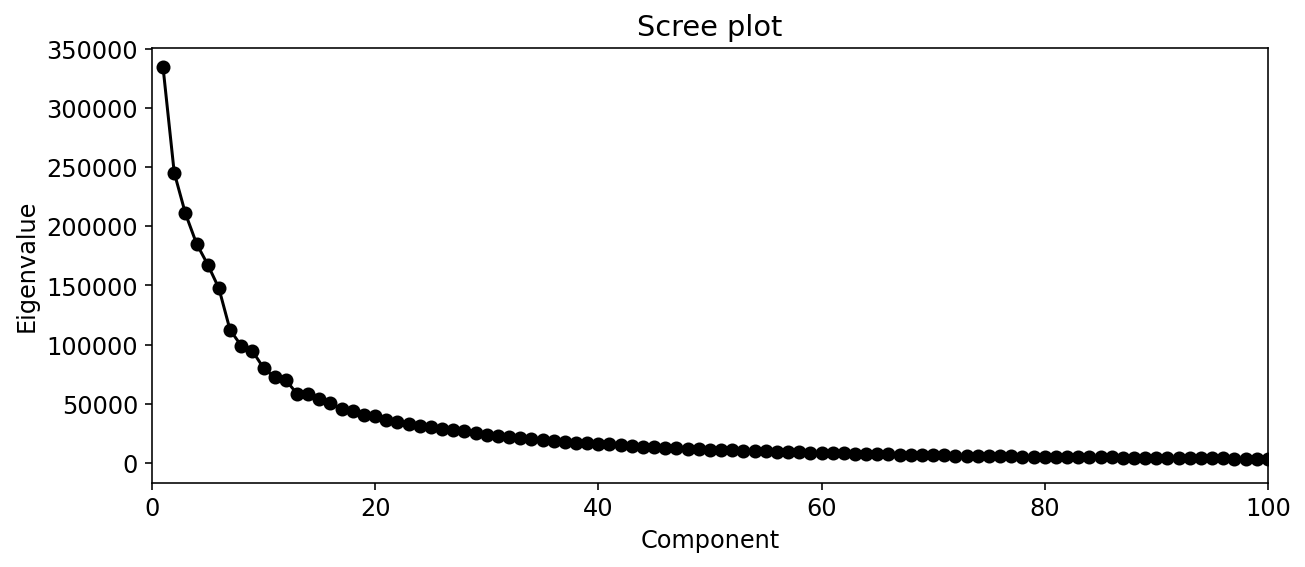

In [114]:
plot_eigenvalues(eigenVal,limit=True)

In [115]:
eigenVal.shape

(784,)

In [116]:
total_variance= np.sum(eigenVal)
pca1_contrib=np.sum(eigenVal[:2])/total_variance *100

In [117]:
print("Percentage contribution of first two Principal components on total variance : {:.2f} %".format(pca1_contrib))


Percentage contribution of first two Principal components on total variance : 16.90 %


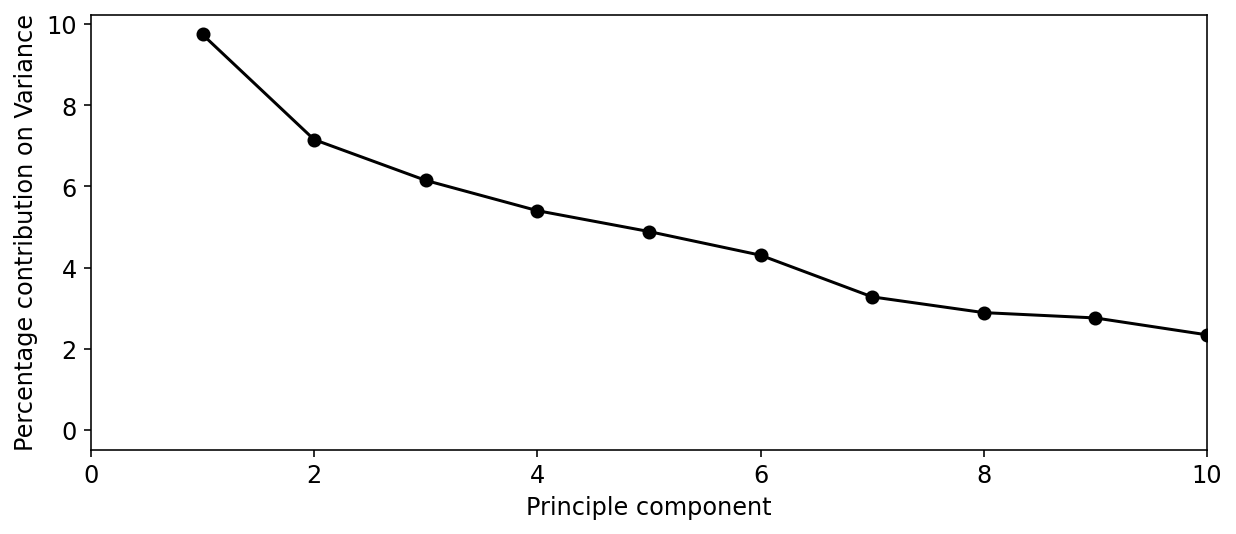

In [118]:
plt.figure(figsize=(10,4))
plt.plot(np.arange(1,len(eigenVal)+1),eigenVal/total_variance*100, 'o-k')
plt.xlim([0,10])
plt.xlabel("Principle component")
plt.ylabel("Percentage contribution on Variance")
plt.show()

In [119]:
def reconstruct_data(score,evectors,X_mean,K):
    
    assert(0<K<=784), "K must be between 1 and 784"
    
    X_reconstructed=np.matmul(score[:,:K],evectors[:,:K].T) + X_mean
    
    return X_reconstructed

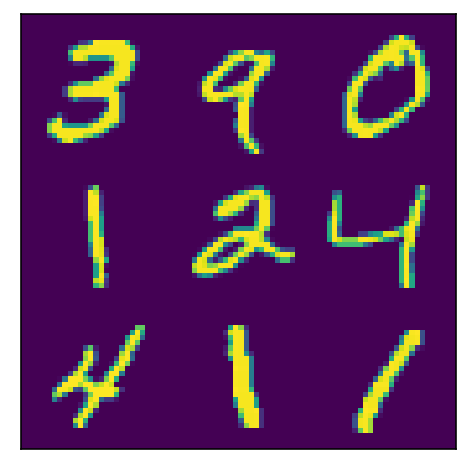

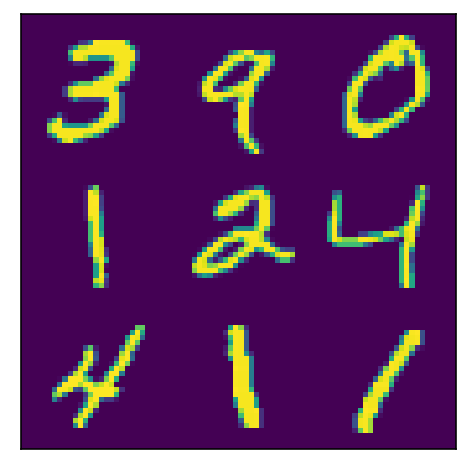

In [128]:
#Image should be identical after reconstruction

K = 784 # 0<K<=784 (total number of pixel values)

X_reconstructed = reconstruct_data(score, eigenVec, mean_by_feature, K)


plot_MNIST_sample(X)
plot_MNIST_sample(X_reconstructed)


In [121]:
X_reconstructed.shape

(70000, 784)

In [24]:
def separate_classes_list(X,y):
    X_classes_list=[]
    y_int=np.zeros(len(y))
    for i in range(len(y)):
        y_int[i]=int(y[i])
    
    
    
    for i in range(10):
        index= np.where(y_int==i)[0]
        
        X_classes_list.append(np.array([X[j] for j in index]))
        
    return X_classes_list

In [25]:
def PCA_by_digit(X_classes_list):
    # create empty lists to populate later
    scores,eigenVecs,eigenVals,centred_datas, mean_by_features=[None]*10,[None]*10,[None]*10,[None]*10,[None]*10
    for i in range(10):
        scores[i],eigenVecs[i],eigenVals[i],centred_datas[i], mean_by_features[i]=pca(X_classes_list[i])
    
    return scores,eigenVecs,eigenVals,centred_datas, mean_by_features

In [26]:
X_classes_list=separate_classes_list(X,y)
score_i,eigenVec_i,eigenVal_i,centred_data_i, mean_by_feature_i= PCA_by_digit(X_classes_list)


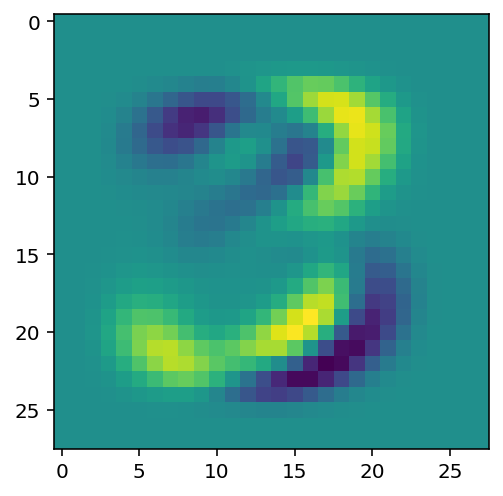

In [27]:
eigenVec_i[3].shape
plt.imshow((eigenVec_i[3][:,0]).reshape(28,28))

In [28]:
X_reconstructed1=reconstruct_data(score_i[1],eigenVec_i[1], mean_by_feature_i[1],K=2)

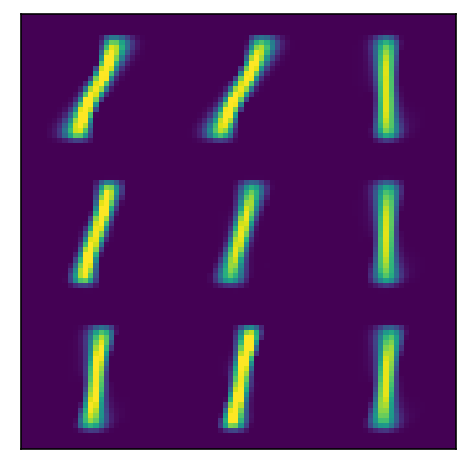

In [29]:
plot_MNIST_sample(X_reconstructed1)

In [46]:
pca_=PCA(2)
projected_X=pca_.fit_transform(X)

In [33]:
projected_X.shape

(70000, 2)

In [34]:
projected_X[0]

array([ 122.25181677, -316.26819757])

In [45]:
a,b= X[0]@eigenVec[:,0], X[0]@eigenVec[:,1]



# K-Means

Plan
1. Plot eigenvectors[:2, 1-9]*eigenvalues from above
2. Apply K means on the dots
3. Plot k mean clusters alongside original and set up discussion

**How does K-means work?** The K-means algorithm involves an iterative procedure of multiple steps which can be summarised as follows:
 1. Choose a value for the number of clusters, $K$. This $K$ is an input to the algorithm and is fixed throughout. There is no correct way for this value to be chosen and it is typically done by either using some domain knowledge of the dataset, through trial and error or through other some other methods (e.g. Elbow Method, Silhouette Method). 
 2. Randomly initialise $K$ cluster centroids. These centroids are points in the data space that represent the mean of a cluster. Typically each of these centroids are initialised at the location of a randomly selected data point.
 3. For each data point, compute the Euclidean distance to each cluster centroid. Assign the data point to the cluster corresponding to the closest centroid.
 4. For each cluster, update the cluster centroid to be the mean of all of the data points assigned to that cluster.
 5. Repeat steps **3** and **4** until the cluster assignments do not change.
 
 https://www.askpython.com/python/examples/plot-k-means-clusters-python

(70000, 784)


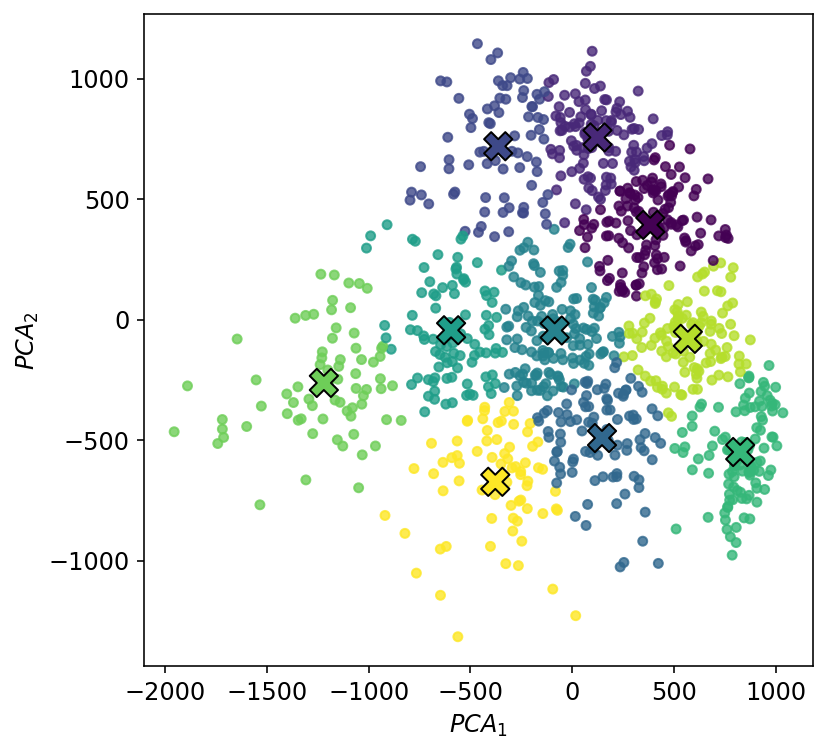

In [85]:


# number of classes
K=10


true_labels=[int(i) for i in y]
print(X.shape)

kMeans_pca=KMeans(K, init='random').fit(projected_data[:1000,:],true_labels[:1000])
clusters=kMeans_pca.predict(projected_data[:1000,:])
centroids=kMeans_pca.cluster_centers_

#plot function from labs
def plot_k_means(X, cluster_assignments, centroid_locations):
    plt.figure(figsize=(6, 6))
    plt.viridis() # Set colour map
    plt.scatter(X[:1000, 0], X[:1000, 1], s=20, c=cluster_assignments, alpha=0.8) # plot data points
    plt.scatter(centroid_locations[:, 0], centroid_locations[:, 1], s=200, marker='X', c=range(K), edgecolors='k') # plot centroids
    plt.xlabel('$PCA_1$')
    plt.ylabel('$PCA_2$')
    plt.show()

plot_k_means(projected_data,clusters,centroids)


In [62]:
Xsubset=projected_data[:1000,:]
labels=kMeans_pca.fit_predict(Xsubset)

labels.shape

(1000,)

[0 1 2 3 4 5 6 7 8 9]


<ipython-input-86-b632fba9274c>:15: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(211)
<ipython-input-86-b632fba9274c>:21: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(212)


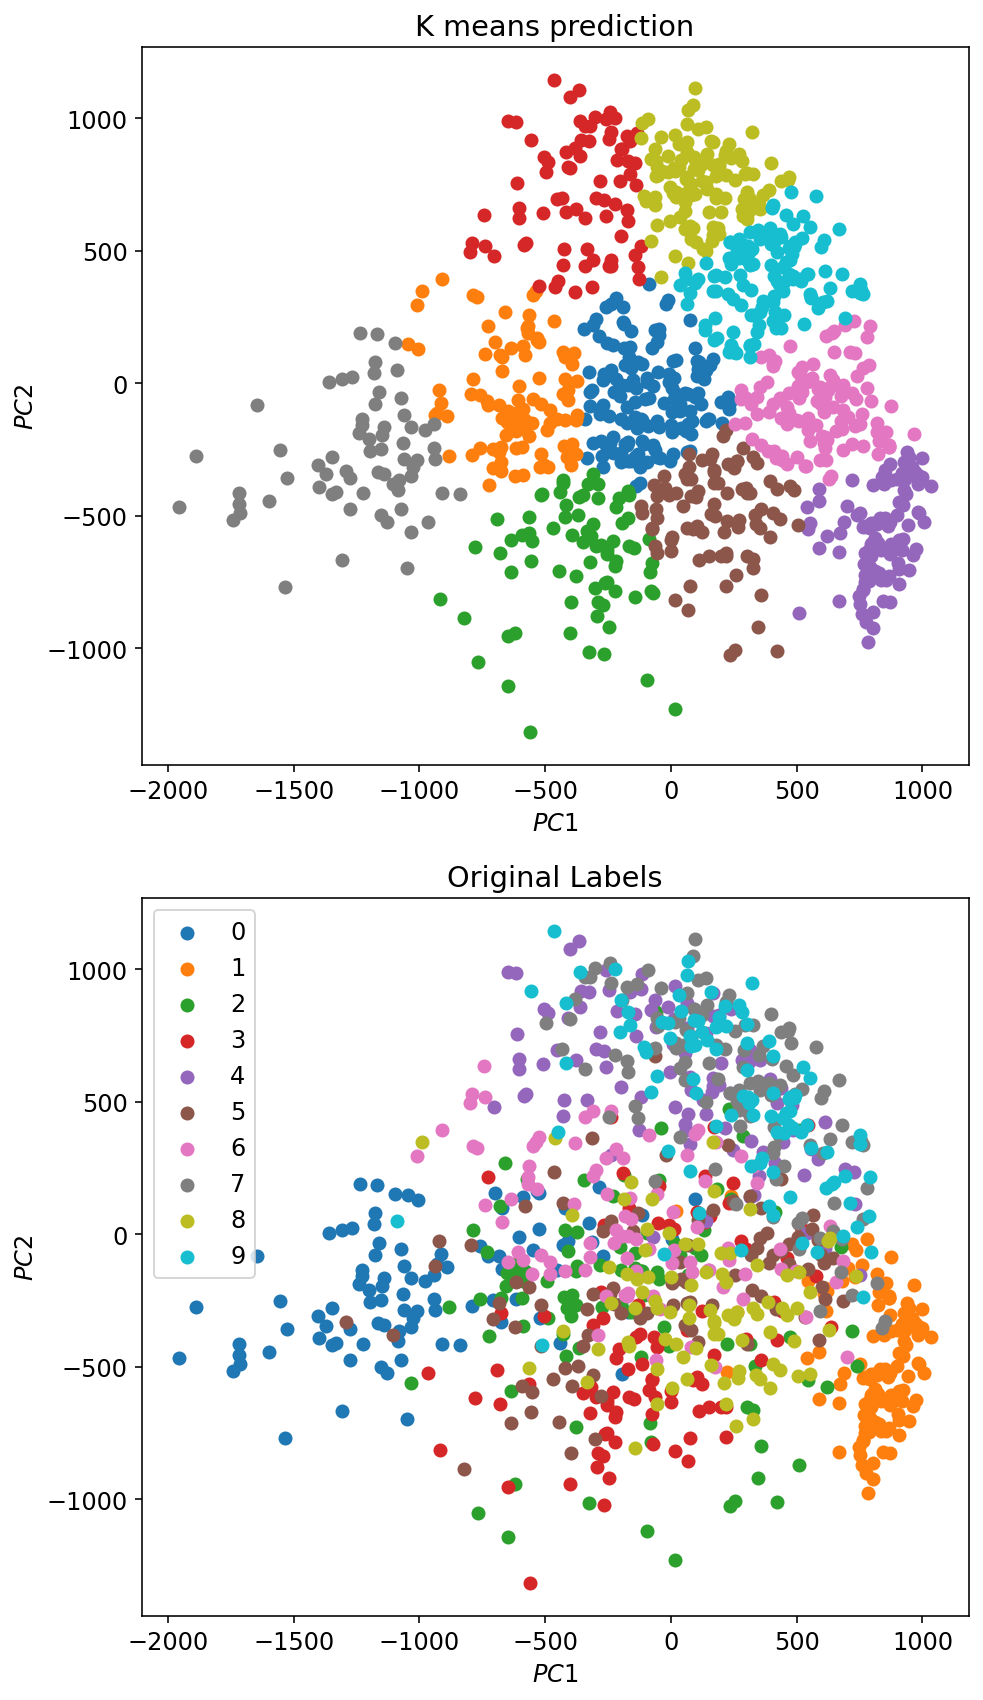

In [86]:

true_labels=[int(i) for i in y[:1000]]

#Getting unique labels
 
u_labels = np.unique(labels)
print(u_labels)

plt.figure(figsize=(7,12))
plt.rcParams['font.size'] = 12


for i in u_labels:
    
    
    plt.subplot(211)
    plt.scatter(Xsubset[labels == i,0], Xsubset[labels==i,1], label= i)
    plt.title('K means prediction')
    plt.xlabel('$PC1$')
    plt.ylabel('$PC2$')
    
    plt.subplot(212)
    plt.scatter(Xsubset[true_labels == i,0],Xsubset[true_labels ==i,1], label = i)
    plt.legend()
    plt.title('Original Labels')
    plt.xlabel('$PC1$')
    plt.ylabel('$PC2$')
    
    plt.tight_layout()
    
   



In [ ]:

# Compute Euclidian distance


In [88]:
#1 plot eigenVectors# Maybe there's an easier way going above
pcList=np.array([i[:,:2] for i in eigenVec_i])

In [91]:
pcList.shape

(10, 784, 2)

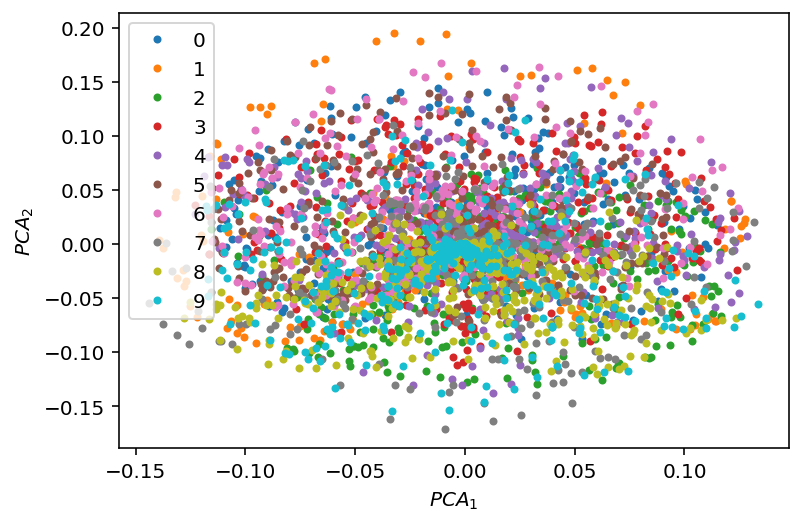

In [115]:
for i in range(10):
   
    plt.plot(pcList[i,:,0],pcList[i,:,1],'.', label=str(i))
    plt.xlabel('$PCA_1$')
    plt.ylabel('$PCA_2$')
    plt.legend()

    

Next steps for K Mean: 
1. Find K means clusters for PCA by individual digits.
2. Compare the centroid locations to those from the 2 components of the whole dataset

Development work for PCA
1. Compare reconstruction with 20 PCs vs reconstruction with 2
2. Time how long it takes.

In [41]:
X_classes_list=separate_classes_list(X,y)
score0,eigenVec0,eigenVal0,centred_data0, mean_by_feature0=pca(X_classes_list[0])
score1,eigenVec1,eigenVal1,centred_data1, mean_by_feature1=pca(X_classes_list[9])

score1.shape

(6958, 784)

In [ ]:
for i in range(10):
    

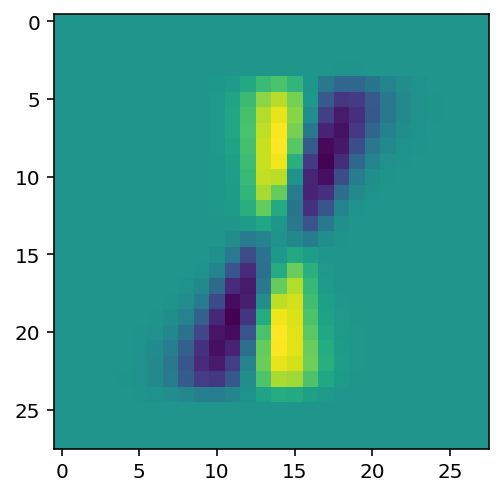

In [34]:
plt.imshow(eigenVec1[:,0].reshape(28,28))

In [ ]:
b=np.ones([2,4], dtype=np.int8)
c=np.ones([3,4],dtype=np.float32)
d=np.concatenate((b,c), axis=0)

In [ ]:
print(d.astype(int))

In [ ]:
numpy.random.random([2,4])

In [ ]:
b=np.arange(10).reshape(2,5)
print(b.reshape(2,5))


In [ ]:
print(b.reshape(1,10))

In [ ]:
print(b.transpose())

In [ ]:
print(b)

In [ ]:
print(b.transpose())

In [ ]:
print(b.reshape(5,2))

In [ ]:
e=np.random.random([2,4])
print(e>0.5)

In [ ]:
print(sum(e>0.5))

In [ ]:
print(b[1:,:])

In [ ]:
print(b[:,::-1])

In [ ]:
print(b[:,2:])

In [ ]:
print(b.sum(axis=0))

In [ ]:
print(b.sum(axis=1, keepdims=True))